In [1]:
%matplotlib inline
import sys
from astropy import table
import numpy as np
from pathlib import Path
from matplotlib import colors, cm
from astropy import convolution
import cmocean
import betterplotlib as bpl

bpl.set_style()

In [2]:
home_dir = Path("../").resolve()
data_dir = home_dir / "data"

In [3]:
sys.path.append(str(home_dir / "pipeline"))
import utils

In [4]:
catalogs = []
for galaxy_dir in data_dir.iterdir():
    cat_name = galaxy_dir / "size" / "final_catalog_final_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
    final_cat = table.Table.read(str(cat_name), format="ascii.ecsv")
    catalogs.append(final_cat)
    
big_catalog = table.vstack(catalogs, join_type="inner")

In [61]:
mask1 = big_catalog["mass_msun"] > 2e5
mask2 = big_catalog["r_eff_pc_rmax_15pix_best"] < 0.5
mask3 = big_catalog["good"]

mask = np.logical_and(mask1, mask2)
mask = np.logical_and(mask, mask3)

In [62]:
def make_cumulative_histogram(values):
    """
    Create the line to be plotted for a cumulative histogram

    :param values: data
    :return: List of xs and ys to be plotted for the cumulative histogram
    """
    sorted_values = np.sort(values)
    ys = np.arange(1, 1 + len(sorted_values), 1)
    assert len(ys) == len(sorted_values)
    return sorted_values, ys / np.max(ys)

In [69]:
scales = {"chi_2_reduced": "linear",
          "Q_probability": "log",
          "age_yr": "log",
          "CI": "linear",
          "E(B-V)": "linear"}

limits = {"chi_2_reduced": [0, 20],
          "Q_probability": [1e-6, 1.5],
          "age_yr": [5e5, 2e10],
          "CI": [1, 2],
          "E(B-V)": [-0.1, 2]}

names = {"chi_2_reduced": "Reduced $\chi^2$",
          "Q_probability": "Q Probability",
          "age_yr": "Age [yr]",
          "CI": "Concentration Index",
          "E(B-V)": "E(B-V)"}

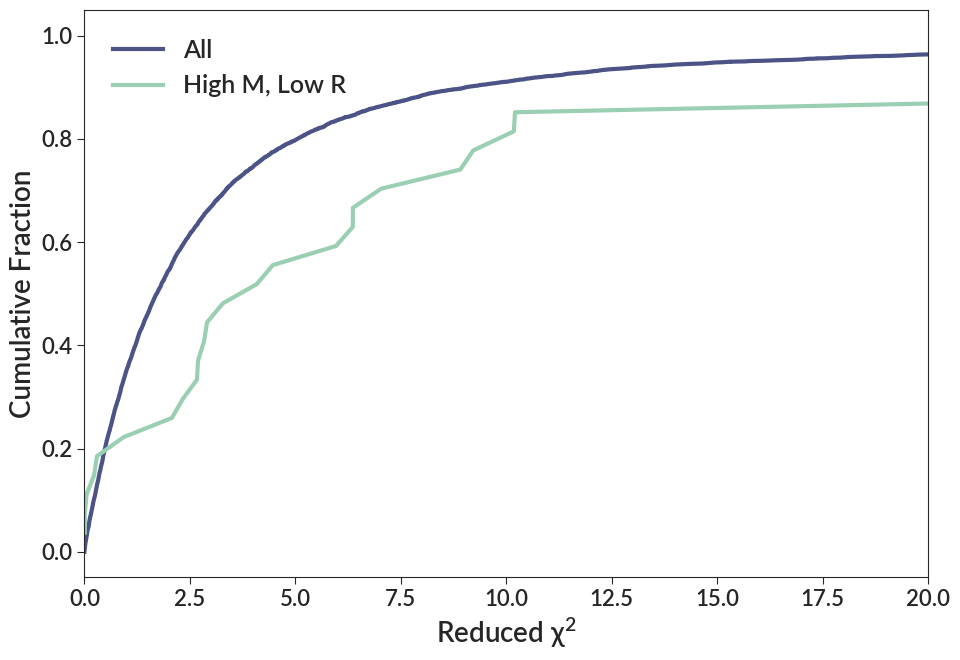

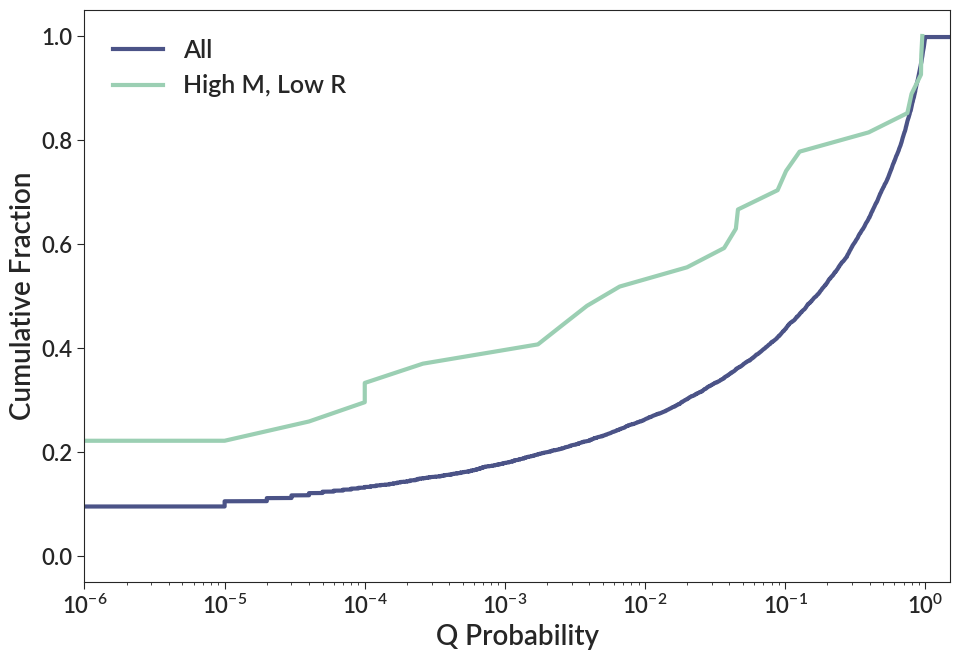

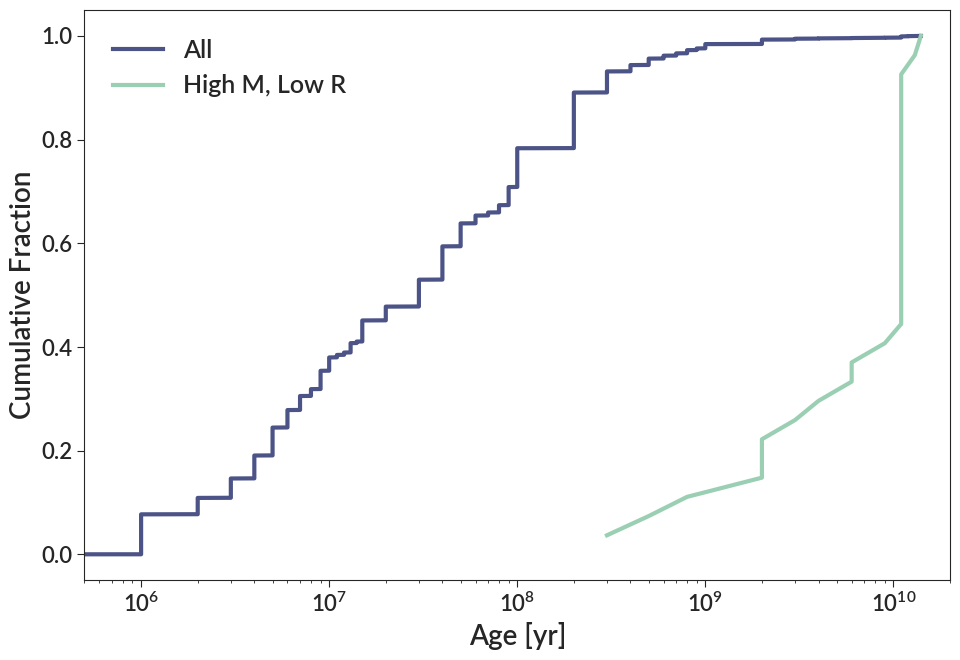

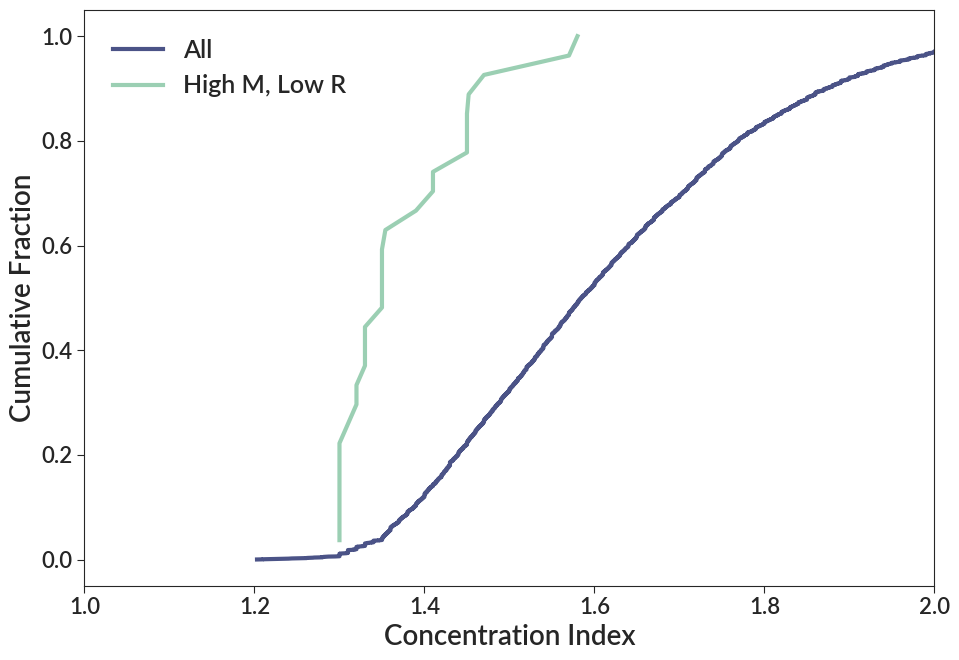

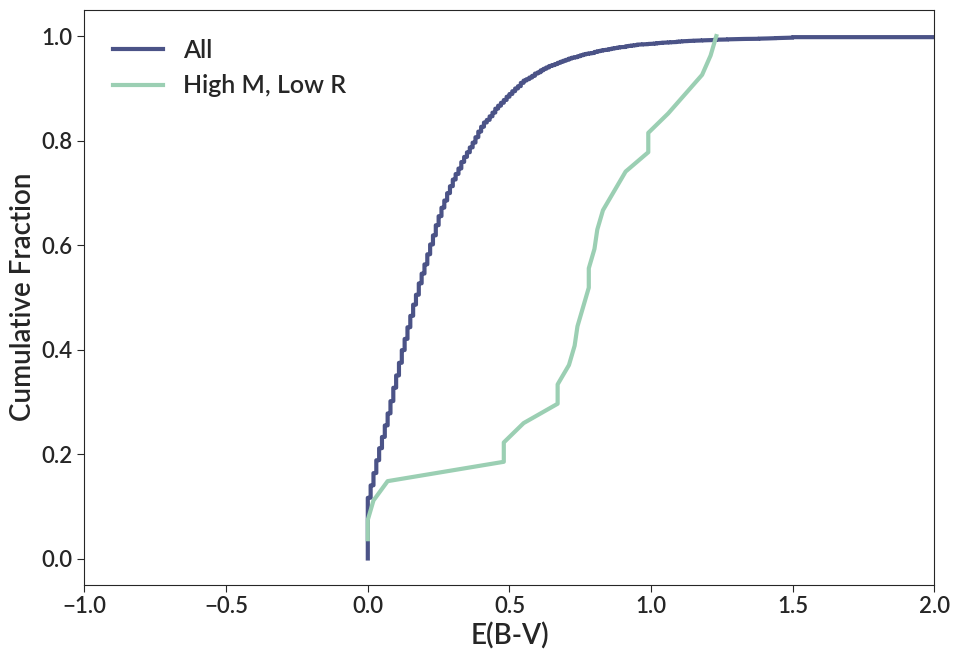

In [68]:
for quantity in scales:
    fig, ax = bpl.subplots()
    ax.plot(*make_cumulative_histogram(big_catalog[quantity]), label="All")
    ax.plot(*make_cumulative_histogram(big_catalog[quantity][mask]), label="High M, Low R")
    ax.set_limits(*limits[quantity])
    ax.set_xscale(scales[quantity])
    ax.legend()
    ax.add_labels(names[quantity], "Cumulative Fraction")

# Correlations

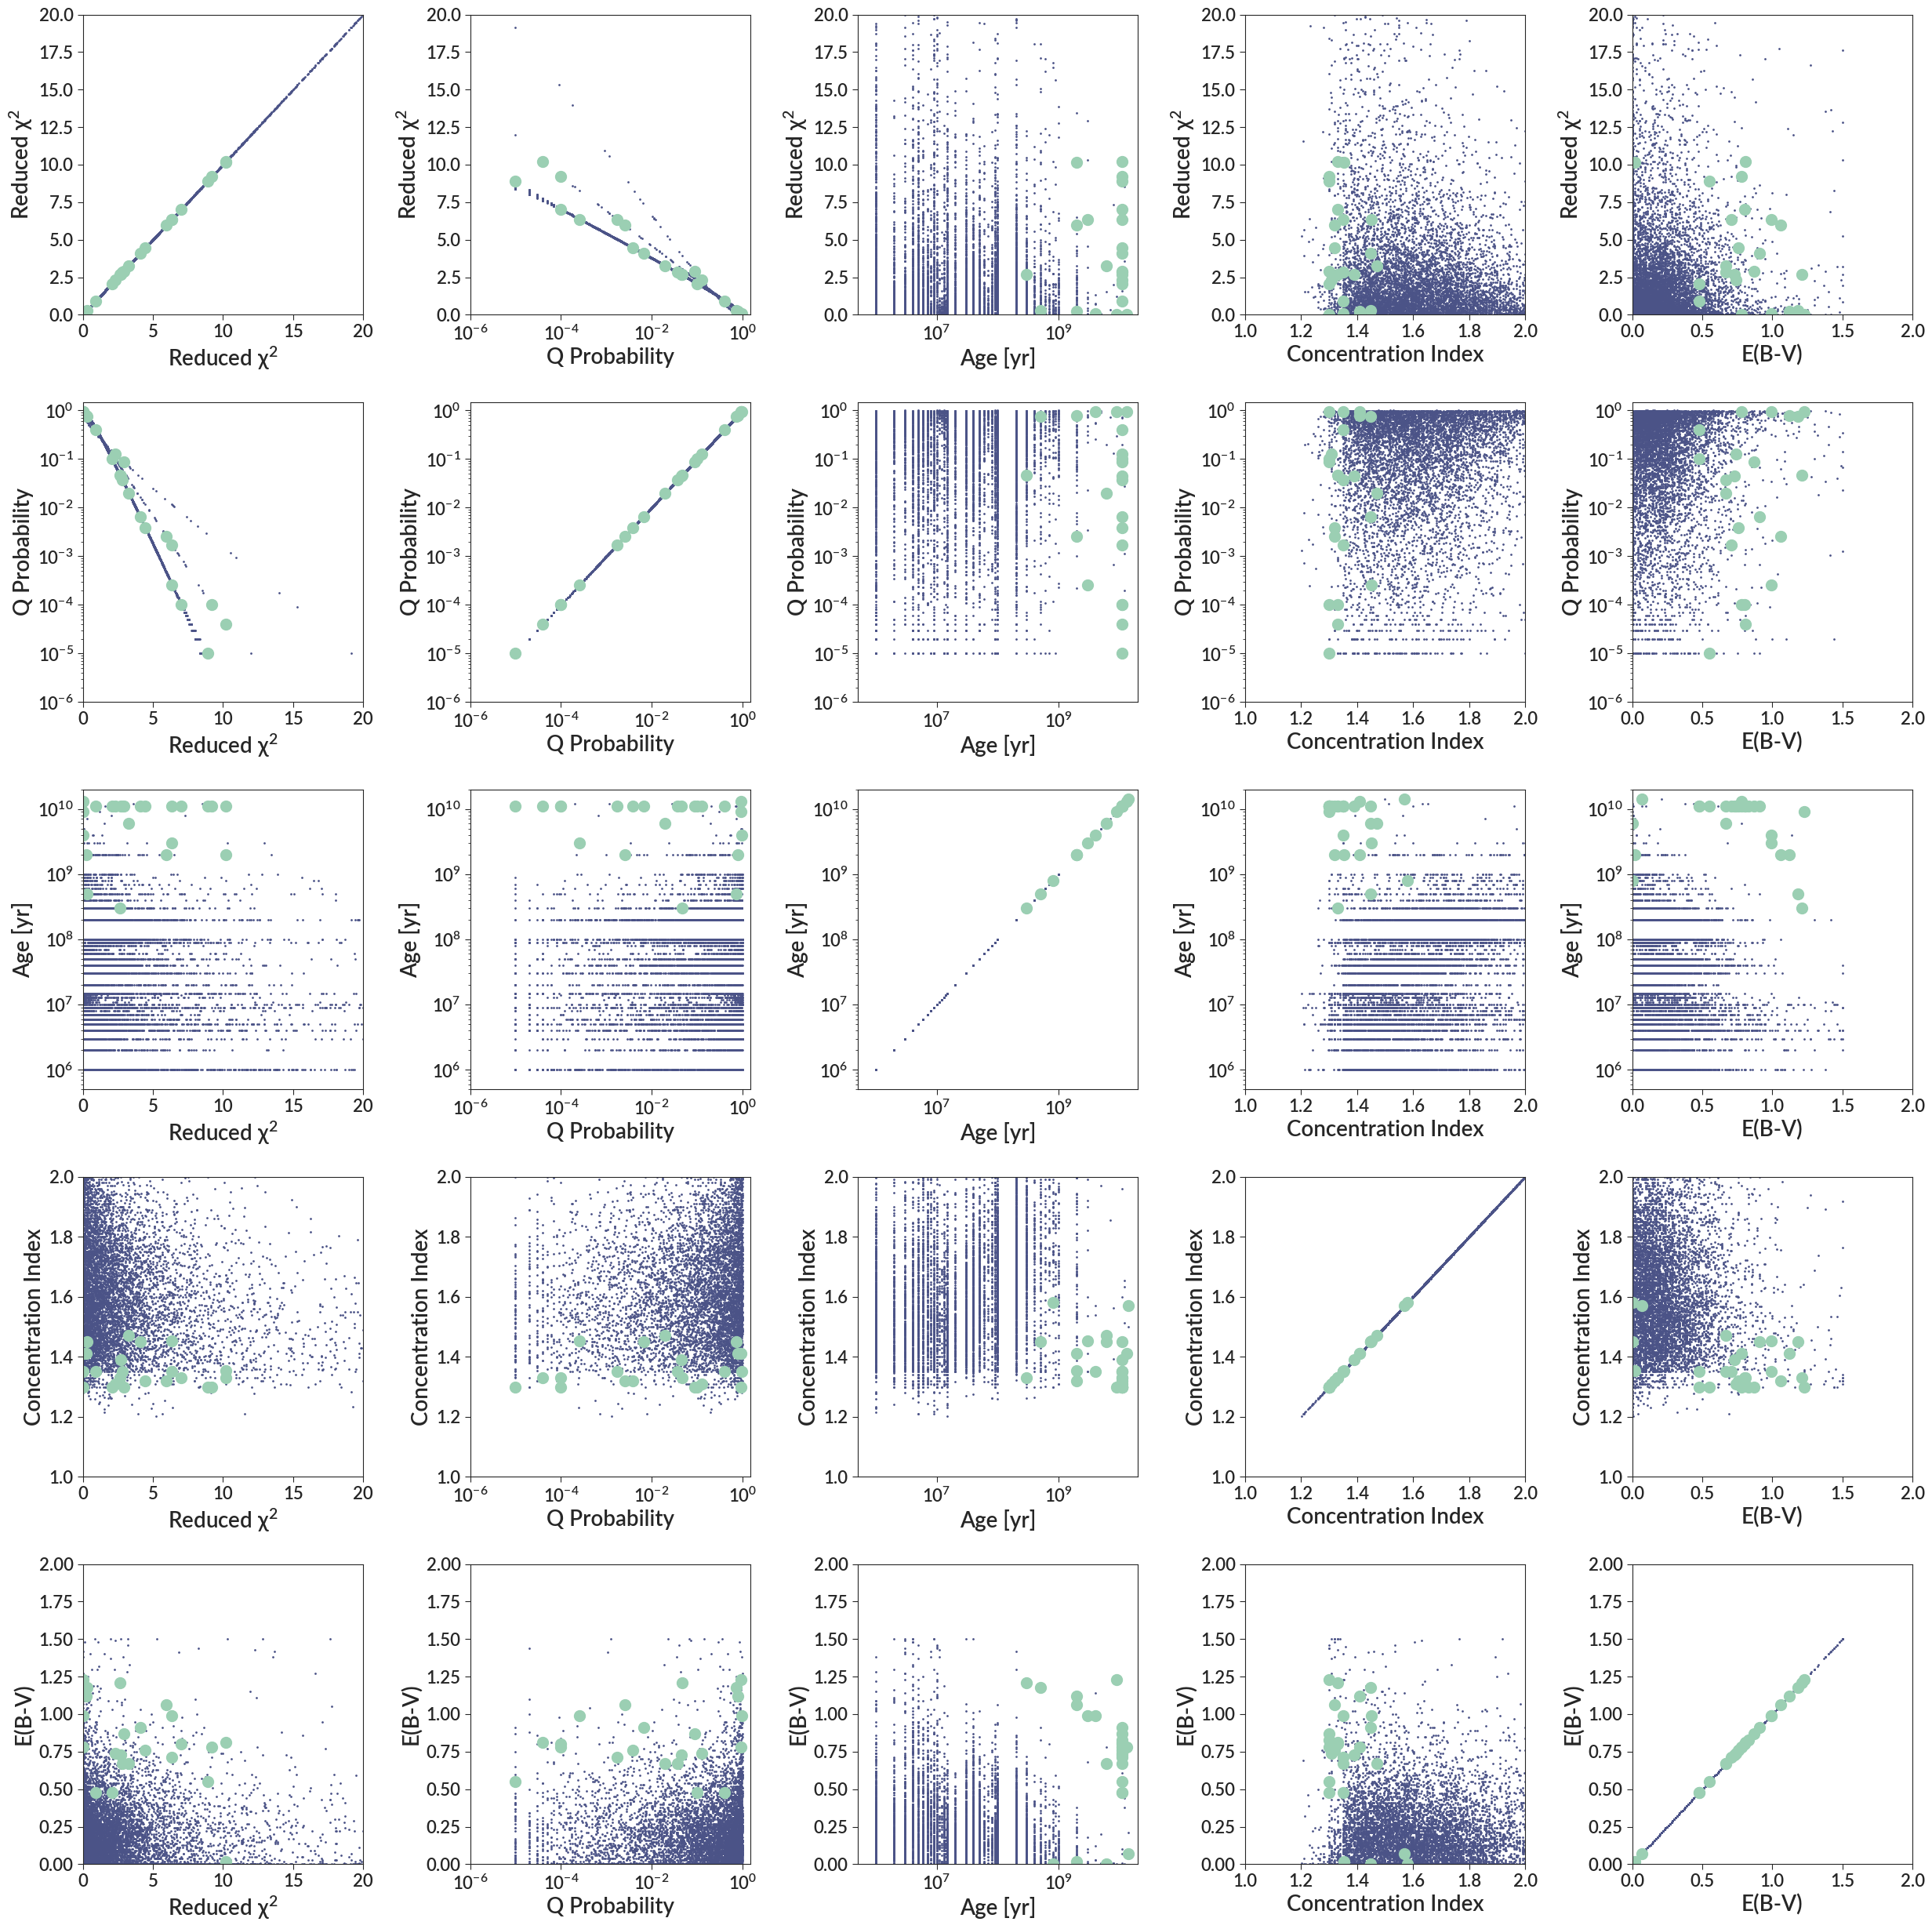

In [65]:
fig, axs = bpl.subplots(ncols=len(scales), nrows=len(scales), 
                       figsize=[5*len(scales), 5*len(scales)])
quantities = scales.keys()

for idx1, quantity1 in enumerate(quantities):
    for idx2, quantity2 in enumerate(quantities):
        ax = axs[idx2][idx1]
        
        ax.scatter(big_catalog[quantity1], big_catalog[quantity2], 
                   label="All", s=1, alpha=1)
        ax.scatter(big_catalog[quantity1][mask], big_catalog[quantity2][mask], 
                   label="High M, Low R", s=100, alpha=1)
        ax.set_limits(*limits[quantity1], *limits[quantity2])
        ax.set_xscale(scales[quantity1])
        ax.set_yscale(scales[quantity2])
        ax.add_labels(names[quantity1], names[quantity2])

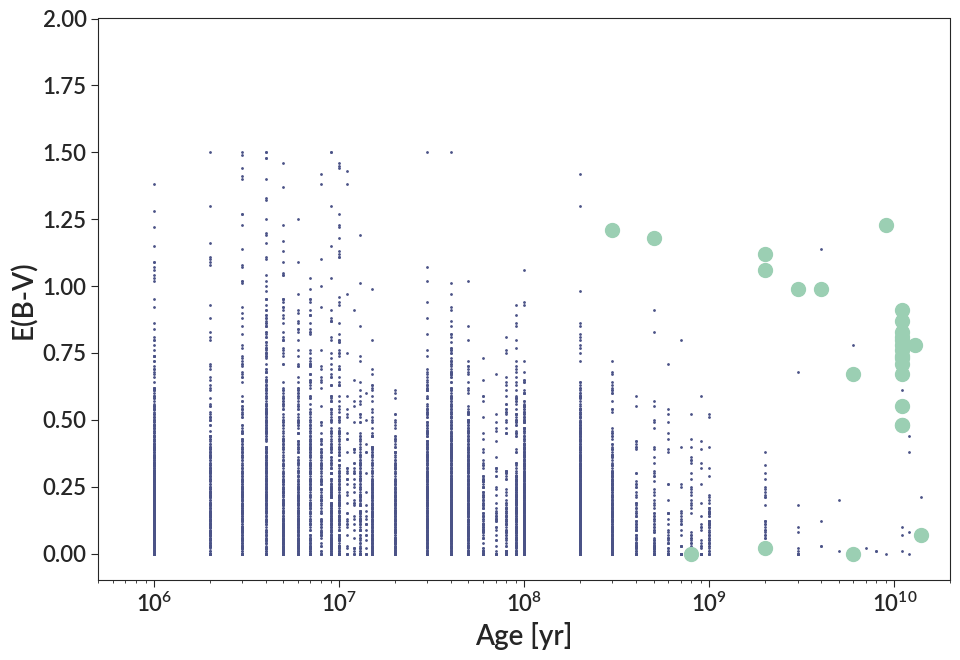

In [73]:
fig, ax = bpl.subplots()

        
ax.scatter(big_catalog["age_yr"], big_catalog["E(B-V)"], 
           label="All", s=1, alpha=1)
ax.scatter(big_catalog["age_yr"][mask], big_catalog["E(B-V)"][mask], 
           label="High M, Low R", s=100, alpha=1)
ax.set_limits(*limits["age_yr"], *limits["E(B-V)"])
ax.set_xscale(scales["age_yr"])
ax.set_yscale(scales["E(B-V)"])
ax.add_labels(names["age_yr"], names["E(B-V)"])
fig.savefig("massive_small.png")